#### This notebook aims to visualize how we augment images for before fitting all those Deep Neural Networks.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image
import seaborn as sns


##### Visualization: For class *_Normal_*.

In [2]:
data_dir = '../datasets/train/NORMAL/' #Gives the path to the normal direcotry.
sample_image = os.path.join(data_dir, 'IM-0128-0001.jpeg') #load the sample x-ray of a normal person.
image = load_img(sample_image, target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)


    Use ImageDataGenerator for Preprocessing

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Define generators for each augmentation
augmentations = {
    'Rotation': {'rotation_range': 20},
    'Width Shift': {'width_shift_range': 0.2},
    'Height Shift': {'height_shift_range': 0.2},
    'Shear': {'shear_range': 0.2},
    'Zoom': {'zoom_range': 0.2},
    'Horizontal Flip': {'horizontal_flip': True}
}

    Apply those transformations and plot images:

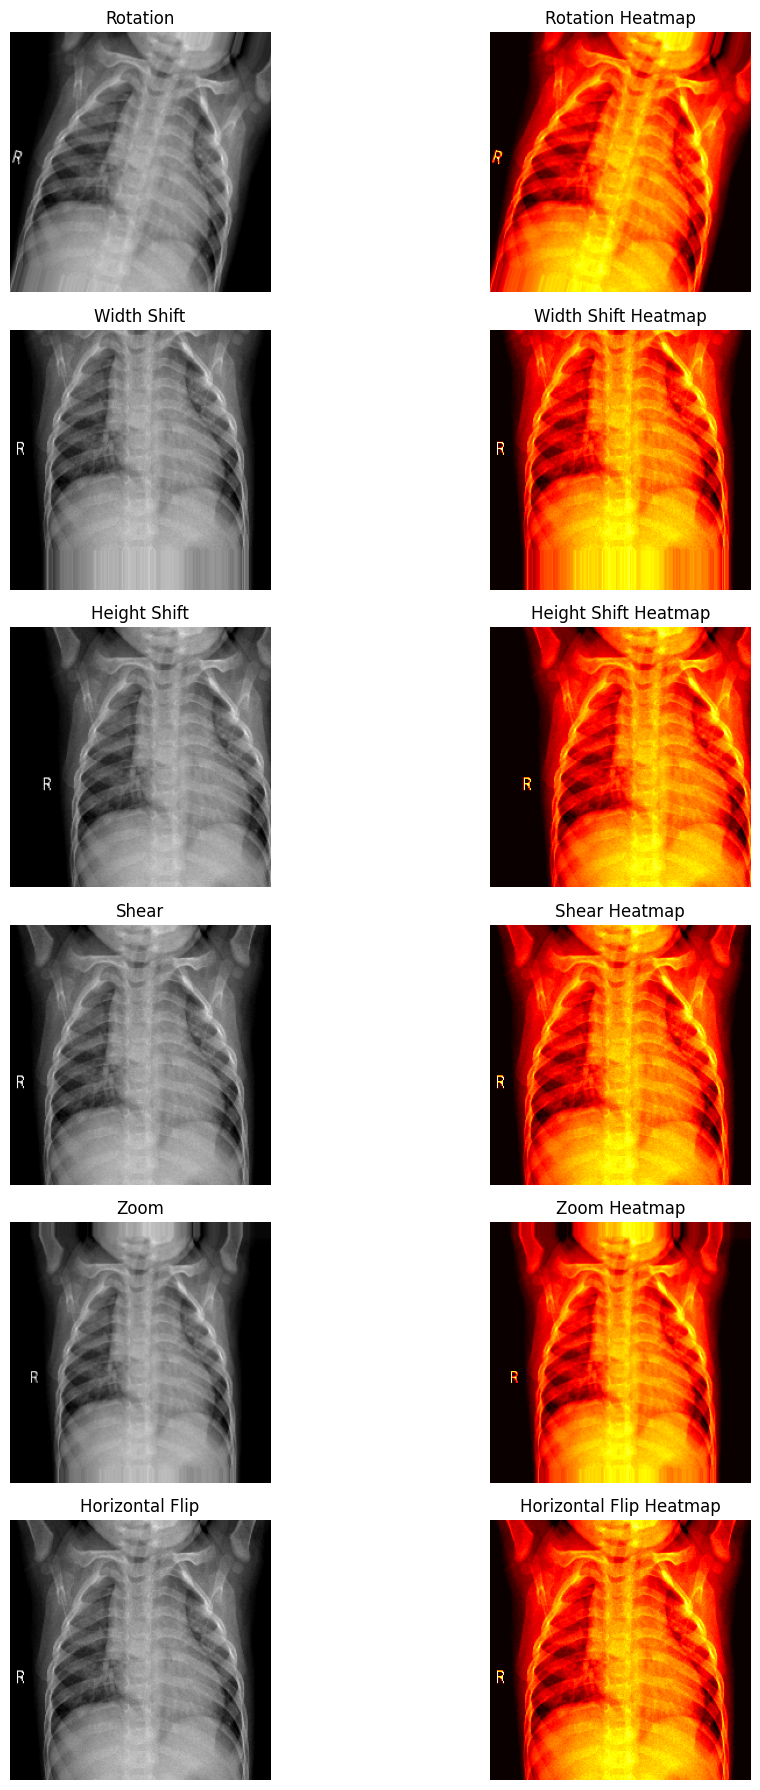

In [4]:
def plot_augmented_images_with_heatmap(image, aug_dict):
    num_augmentations = len(aug_dict)
    fig, axes = plt.subplots(nrows=num_augmentations, ncols=2, figsize=(12, num_augmentations * 3))

    for i, (aug_name, aug_params) in enumerate(aug_dict.items()):
        # Create a temporary generator with the current augmentation
        temp_gen = ImageDataGenerator(**aug_params, rescale=1./255)
        aug_image = next(temp_gen.flow(image, batch_size=1))[0]

        # Original or Augmented Image
        axes[i, 0].imshow(aug_image, cmap='bone')
        axes[i, 0].set_title(f'{aug_name}')
        axes[i, 0].axis('off')

        # Corresponding Heatmap
        aug_image_gray = np.mean(aug_image, axis=-1)
        axes[i, 1].imshow(aug_image_gray, cmap='hot')
        axes[i, 1].set_title(f'{aug_name} Heatmap')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot the images
plot_augmented_images_with_heatmap(image, augmentations)

##### Visualization: For class *Pneumonia*.

In [5]:
data_dir = '../datasets/train/PNEUMONIA/' #Gives the path to the normal direcotry.
sample_image = os.path.join(data_dir, 'person5_bacteria_17.jpeg') #load the sample x-ray of a normal person.
image = load_img(sample_image, target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Define generators for each augmentation
augmentations = {
    'Rotation': {'rotation_range': 20},
    'Width Shift': {'width_shift_range': 0.2},
    'Height Shift': {'height_shift_range': 0.2},
    'Shear': {'shear_range': 0.2},
    'Zoom': {'zoom_range': 0.2},
    'Horizontal Flip': {'horizontal_flip': True}
}

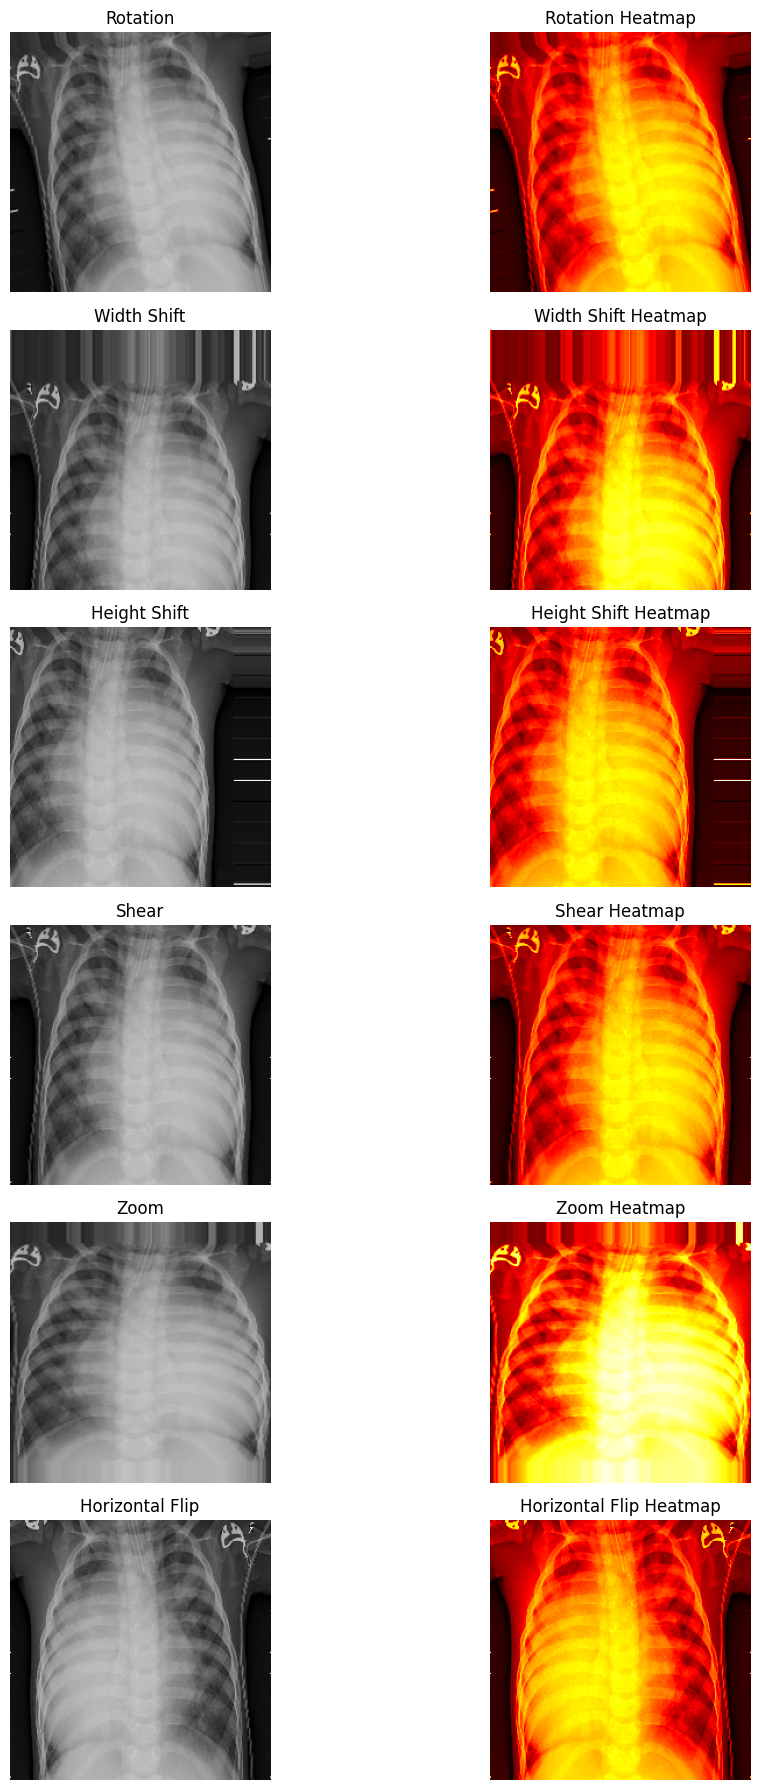

In [7]:
def plot_augmented_images_with_heatmap(image, aug_dict):
    num_augmentations = len(aug_dict)
    fig, axes = plt.subplots(nrows=num_augmentations, ncols=2, figsize=(12, num_augmentations * 3))

    for i, (aug_name, aug_params) in enumerate(aug_dict.items()):
        # Create a temporary generator with the current augmentation
        temp_gen = ImageDataGenerator(**aug_params, rescale=1./255)
        aug_image = next(temp_gen.flow(image, batch_size=1))[0]

        # Original or Augmented Image
        axes[i, 0].imshow(aug_image, cmap='bone')
        axes[i, 0].set_title(f'{aug_name}')
        axes[i, 0].axis('off')

        # Corresponding Heatmap
        aug_image_gray = np.mean(aug_image, axis=-1)
        axes[i, 1].imshow(aug_image_gray, cmap='hot')
        axes[i, 1].set_title(f'{aug_name} Heatmap')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot the images
plot_augmented_images_with_heatmap(image, augmentations)